In [1]:
import pandas as pd
import numpy as np

# Load the dataset
url = "https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data"
df = pd.read_csv("AB_NYC_2019.csv")  

# Display the first few rows
print(df.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [2]:
# Check for missing values
print(df.isnull().sum())

# Drop irrelevant columns
df = df.drop(['id', 'host_name', 'last_review'], axis=1)

# Fill missing values in 'reviews_per_month' with 0
df['reviews_per_month'].fillna(0, inplace=True)

# Check for duplicates
print(df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

# Check data types
print(df.dtypes)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
0
name                               object
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_n

In [3]:
# Summary statistics for numerical columns
print(df.describe())

# Count of unique values in categorical columns
print(df['neighbourhood_group'].value_counts())
print(df['room_type'].value_counts())

            host_id      latitude     longitude         price  minimum_nights  \
count  4.889500e+04  48895.000000  48895.000000  48895.000000    48895.000000   
mean   6.762001e+07     40.728949    -73.952170    152.720687        7.029962   
std    7.861097e+07      0.054530      0.046157    240.154170       20.510550   
min    2.438000e+03     40.499790    -74.244420      0.000000        1.000000   
25%    7.822033e+06     40.690100    -73.983070     69.000000        1.000000   
50%    3.079382e+07     40.723070    -73.955680    106.000000        3.000000   
75%    1.074344e+08     40.763115    -73.936275    175.000000        5.000000   
max    2.743213e+08     40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       48895.000000                    48895.000000   
mean           23.274466           1.090910                        7.143982   
std            44.550582         

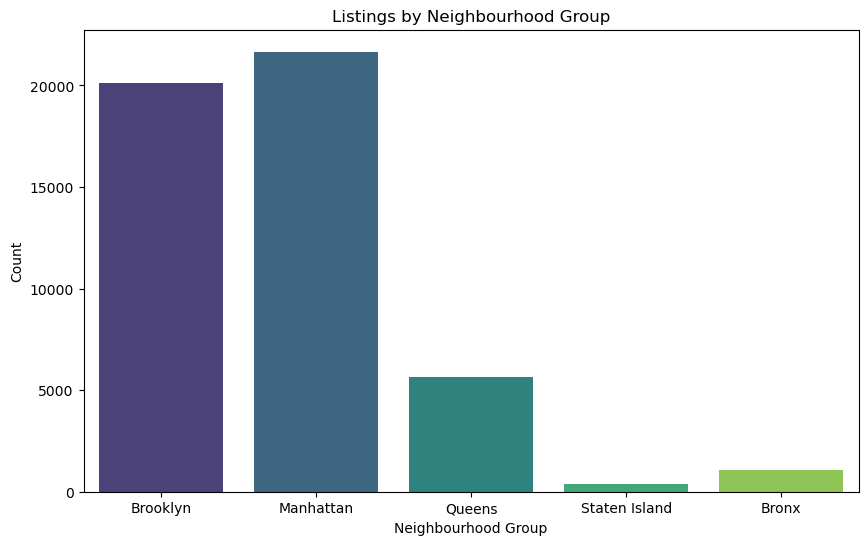

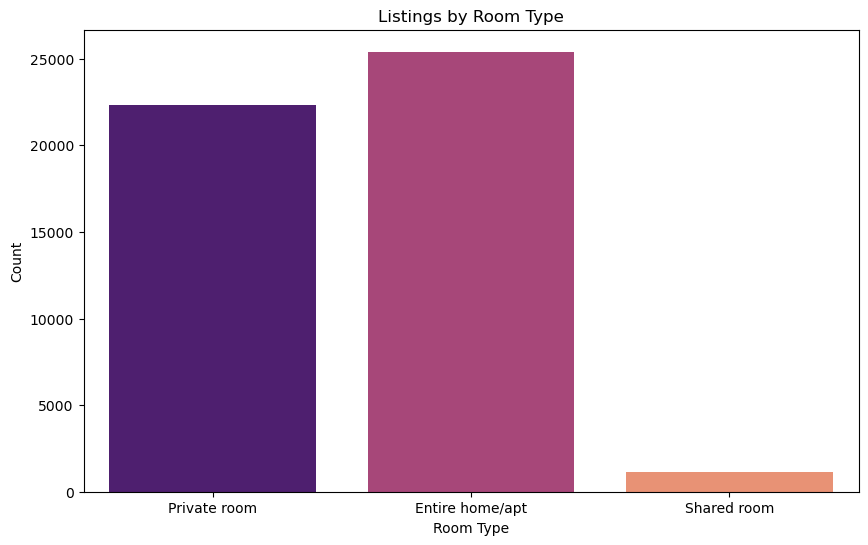

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of listings by neighbourhood group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='neighbourhood_group', palette='viridis')
plt.title('Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

# Distribution of listings by room type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='room_type', palette='magma')
plt.title('Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

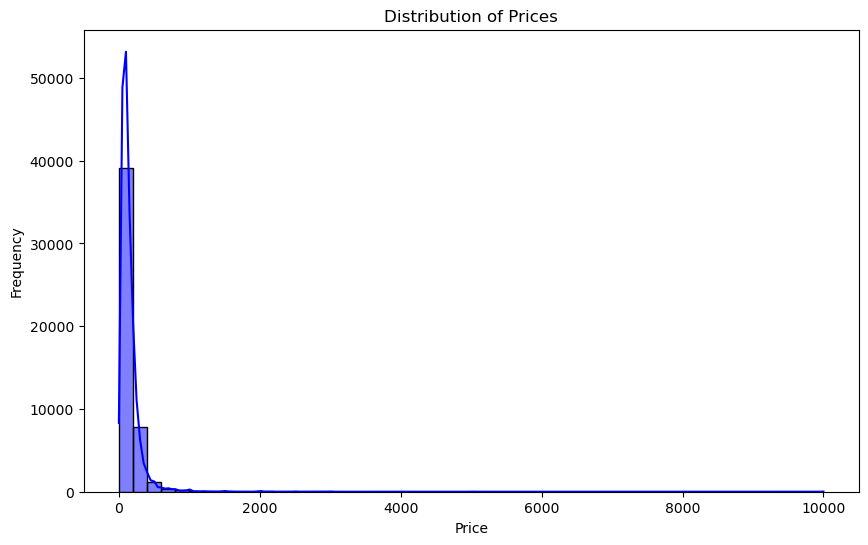

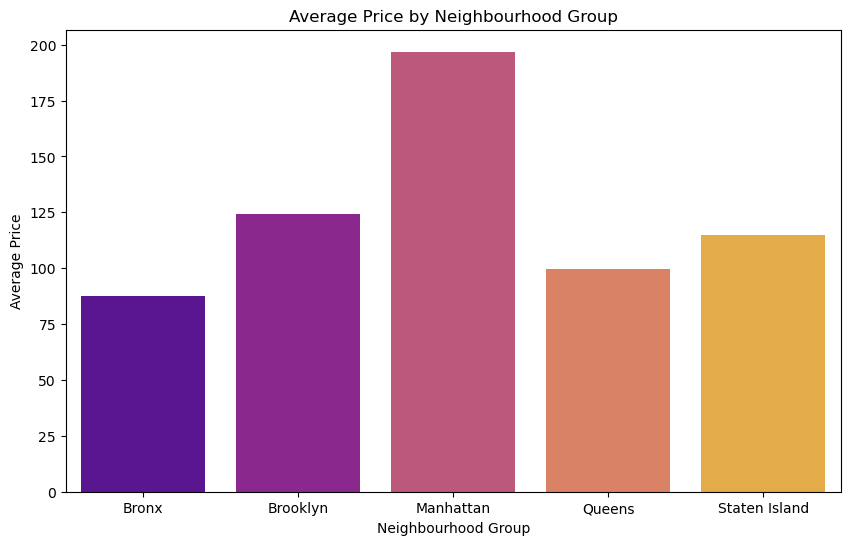

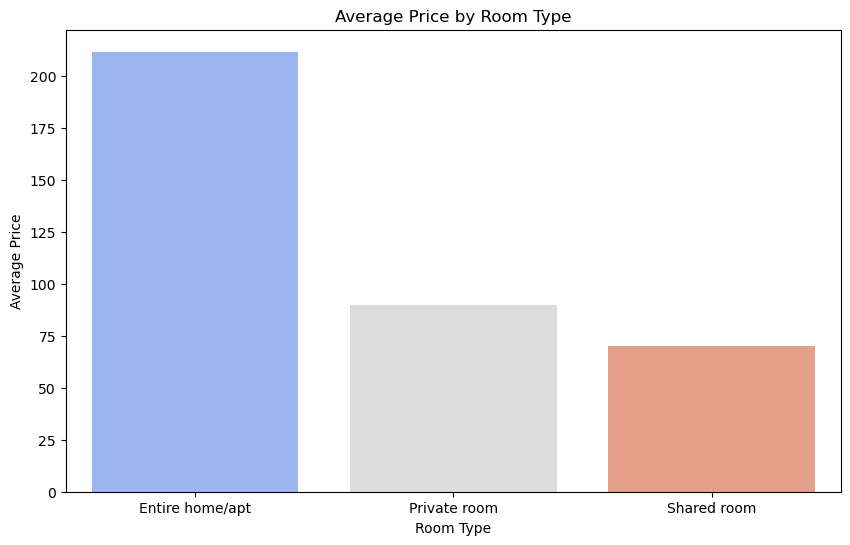

In [5]:
# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Average price by neighbourhood group
avg_price_by_neighbourhood = df.groupby('neighbourhood_group')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_neighbourhood, x='neighbourhood_group', y='price', palette='plasma')
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.show()

# Average price by room type
avg_price_by_room_type = df.groupby('room_type')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_room_type, x='room_type', y='price', palette='coolwarm')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

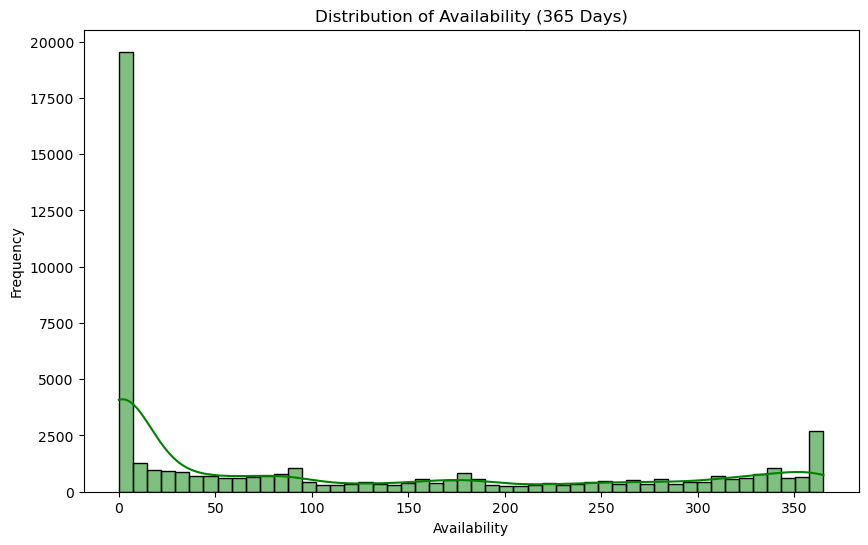

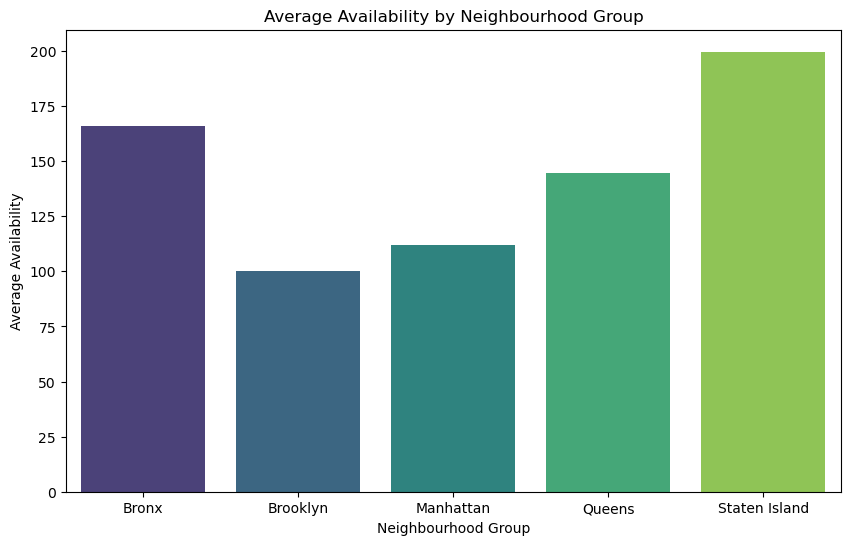

In [6]:
# Distribution of availability
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_365'], bins=50, kde=True, color='green')
plt.title('Distribution of Availability (365 Days)')
plt.xlabel('Availability')
plt.ylabel('Frequency')
plt.show()

# Average availability by neighbourhood group
avg_availability_by_neighbourhood = df.groupby('neighbourhood_group')['availability_365'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_availability_by_neighbourhood, x='neighbourhood_group', y='availability_365', palette='viridis')
plt.title('Average Availability by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Availability')
plt.show()

/var/folders/lm/c170c3l525jdjckx1ql35jmw0000gn/T/ipykernel_17372/3162064017.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


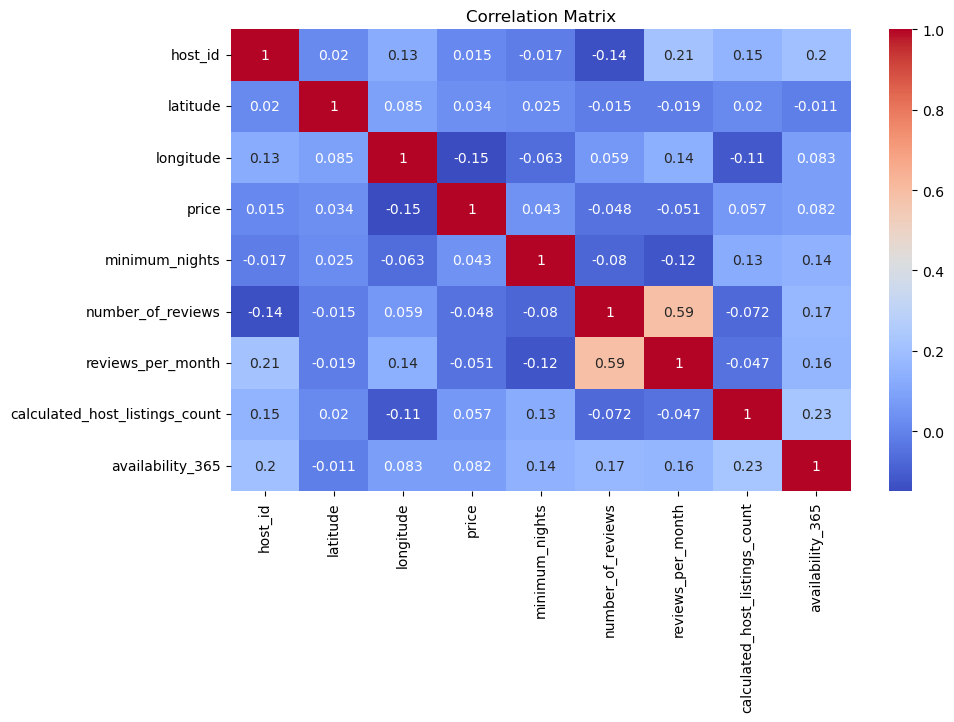

In [7]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

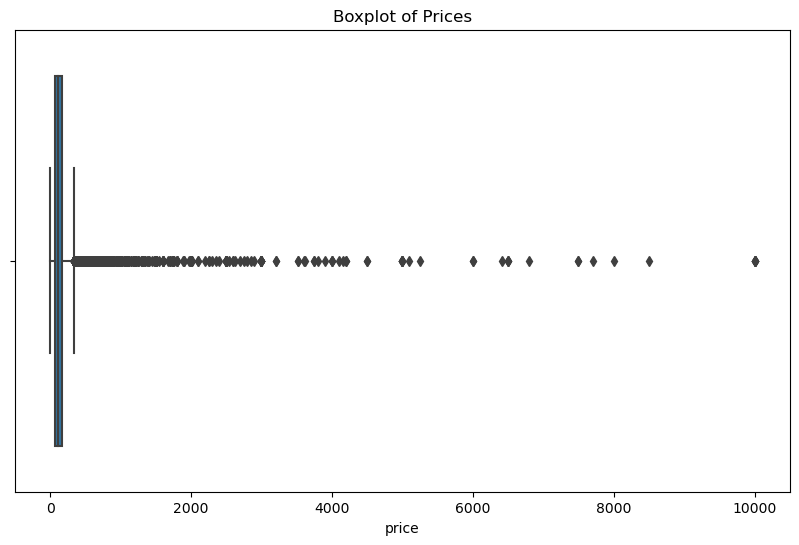

In [8]:
# Boxplot for price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='price')
plt.title('Boxplot of Prices')
plt.show()

# Remove outliers
df = df[df['price'] <= 500]

/Users/hemangikakirde/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


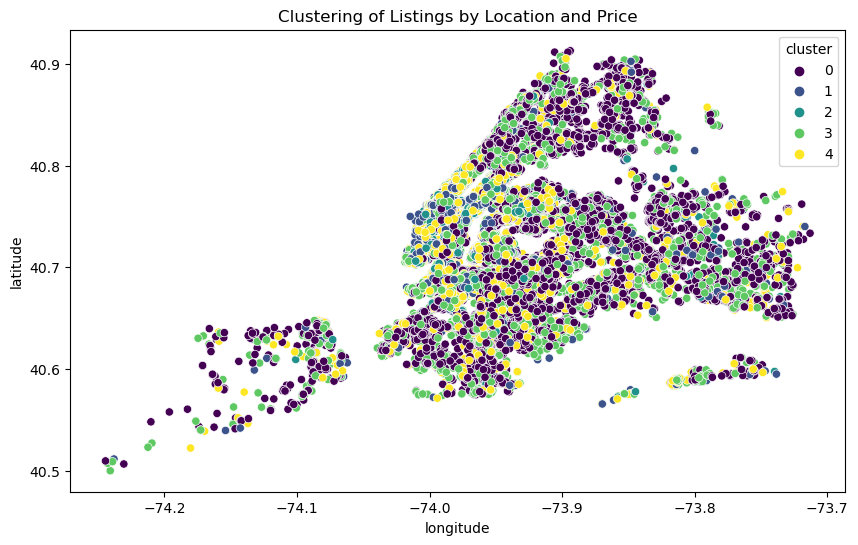

In [9]:
from sklearn.cluster import KMeans

# Select features for clustering
X = df[['latitude', 'longitude', 'price']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='cluster', palette='viridis')
plt.title('Clustering of Listings by Location and Price')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data for modeling
X = df[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']]
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 7208.172915481763
